# Perguntas que eu busco responder com esta EDA

 - Quanto capital o setor de serviços de informação e comunicação gerou na faixa de tempo do dataset? Como esse valor evoluiu ao longo dos anos? Quanto dessa riqueza cada setor gerou? Como foi a evolução para cada subsetor? 
 - No período de 2007 a 2021, qual foi o ano que teve maior renda bruta? Quanto dessa riqueza cada setor gerou?
 - No intervalo de anos no dataset, qual subsetor que mais contratou? Ao longo dos anos, qual foi o subsetor que, em média, manteve o maior número de empregados?
 - Qual subsetor teve os maiores custos intermediários ao longos dos anos? Qual foi ano em que esse subsetor teve o maior custo intermediário?
 - Qual subsetor teve a maior eficiência pelo valor gerador a partir dos insumos de produtos/serviços? Quais subsetores foram os mais eficientes? Quais foram menos?
 - No geral, de todos os custos intermediários, quais foram os que custaram mais? e os que custaram menos? Como esses custos evoluiram ao longo dos anos? 
 - No setor de serviços de informação e comunicação, qual foi o maior gasto com pessoal ao longo dos anos? Em qual ano esse gasto teve seu maior valor? Como esses gastos evoluiram ao longo dos anos? Qual foi, percentualmente falando, a contribuição de cada gasto com pessoal para o valor total de gasto com pessoal?

## Importação das bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## Carregando dataset

In [2]:
si_br_df = pd.read_csv("datasets/si_br.csv")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
si_br_df.head()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades,setor
0,2007,397811.00,5593.00,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,10536.00,...,20413.00,7912.00,730.00,2180.00,9103.00,13.00,137424.00,5202.00,1430.00,agencia_noticias
1,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,11232.00,...,20133.00,8063.00,926.00,2830.00,10195.00,2.00,139649.00,5109.00,1347.00,agencia_noticias
2,2009,542945.00,5593.00,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,13202.00,...,23419.00,11092.00,2090.00,4694.00,14007.00,13.00,181530.00,7477.00,1653.00,agencia_noticias
3,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,14162.00,...,27394.00,12433.00,649.00,7623.00,15816.00,11.00,214166.00,9813.00,2581.00,agencia_noticias
4,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,23798.00,...,38409.00,16381.00,1741.00,5920.00,26819.00,13.00,552752.00,13913.00,3511.00,agencia_noticias


In [3]:
si_br_df.describe()

,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
count,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,...,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00
mean,2014.00,61209648.77,2124436.44,1881441.31,60966802.79,28997351.60,3014030.35,93008.91,11681026.60,2526717.95,...,9099939.48,1364237.83,671085.07,116370.13,335390.45,1611702.69,819.71,17907286.01,189581.73,19520.17
std,4.35,61944287.07,2906517.69,2498096.24,61566129.60,30020075.95,3372820.13,77363.73,14661156.03,3779787.27,...,11020209.99,1469504.56,807748.71,133862.26,315461.11,2018356.84,1948.31,21458696.06,182987.44,22038.09
min,2007.00,397811.00,232.00,744.00,399186.00,116064.00,25002.00,1034.00,32803.00,10536.00,...,105360.00,20133.00,7912.00,649.00,2180.00,9103.00,1.00,137424.00,5109.00,1347.00
25%,2010.00,16659660.50,31438.00,263380.00,16589925.50,8850050.00,536417.00,45309.00,2019797.00,274746.00,...,3012722.50,420247.50,218962.50,20198.00,106294.50,367178.50,61.50,2784861.50,82008.00,5586.00
50%,2014.00,36753465.00,304329.00,947987.00,37034186.00,17567994.00,1544740.00,71086.00,5414477.00,955854.00,...,5361604.00,749757.00,392035.00,55681.00,247666.00,830639.00,128.00,7109000.00,126019.00,11011.00
75%,2018.00,114313693.00,3498256.50,2302911.00,110940843.00,41070114.00,5161836.50,129591.00,16757632.50,2732519.50,...,10136498.50,1904764.00,780556.50,156570.50,489123.50,2208112.50,513.50,31926277.50,210767.00,15592.00
max,2021.00,214207142.00,10024671.00,11459944.00,215121305.00,94037717.00,13196048.00,386874.00,47864792.00,16204784.00,...,52667294.00,7206584.00,3786478.00,557416.00,1246556.00,9513061.00,14259.00,71543379.00,731817.00,77463.00


## Quanto capital o setor de serviços de informação e comunicação gerou na faixa de tempo do dataset? 

In [4]:
si_capital = si_br_df.groupby(["setor", "ano"]).sum()
si_capital.head()

receita_operacional_liquida  \
setor            ano                                 
agencia_noticias 2007                    397811.00   
                 2008                    421744.00   
                 2009                    542945.00   
                 2010                    686085.00   
                 2011                   1189552.00   

                       custo_das_mercadorias_revendidas_mil_reais  \
setor            ano                                                
agencia_noticias 2007                                     5593.00   
                 2008                                      232.00   
                 2009                                     5593.00   
                 2010                                      580.00   
                 2011                                     4766.00   

                       subvencoes_e_outras_receitas_operacionais_mil_reais  \
setor            ano                                                         
agencia_noticias 2007                                            1375.00     
                 2008                                             744.00     
                 2009                                            5383.00     
                 2010                                            3848.00     
                 2011                                            3910.00     

                       valor_bruto_da_producao  consumo_intermediario_total  \
setor            ano                                                          
agencia_noticias 2007                399186.00                    116064.00   
                 2008                422256.00                    132806.00   
                 2009                548328.00                    162131.00   
                 2010                689353.00                    210747.00   
                 2011               1188696.00                    279328.00   

                       consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao  \
setor            ano                                                                           
agencia_noticias 2007                                           25002.00                       
                 2008                                           35366.00                       
                 2009                                           52535.00                       
                 2010                                           52189.00                       
                 2011                                           72301.00                       

                       consumo_intermediario_combustiveis_e_lubrificantes  \
setor            ano                                                        
agencia_noticias 2007                                            1164.00    
                 2008                                            1034.00    
                 2009                                            1540.00    
                 2010                                            1285.00    
                 2011                                            1471.00    

                       consumo_intermediario_servicos_prestados_por_terceiros  \
setor            ano                                                            
agencia_noticias 2007                                           32803.00        
                 2008                                           46552.00        
                 2009                                           47386.00        
                 2010                                           53485.00        
                 2011                                           64213.00        

                       consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos  \
setor            ano                                                                                
agencia_noticias 2007                                           10536.00    

In [5]:
si_capital = si_capital.reset_index()
si_capital

,setor,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,agencia_noticias,2007,397811.00,5593.00,1375.00,399186.00,116064.00,25002.00,1164.00,32803.00,...,105360.00,20413.00,7912.00,730.00,2180.00,9103.00,13.00,137424.00,5202.00,1430.00
1,agencia_noticias,2008,421744.00,232.00,744.00,422256.00,132806.00,35366.00,1034.00,46552.00,...,107650.00,20133.00,8063.00,926.00,2830.00,10195.00,2.00,139649.00,5109.00,1347.00
2,agencia_noticias,2009,542945.00,5593.00,5383.00,548328.00,162131.00,52535.00,1540.00,47386.00,...,149352.00,23419.00,11092.00,2090.00,4694.00,14007.00,13.00,181530.00,7477.00,1653.00
3,agencia_noticias,2010,686085.00,580.00,3848.00,689353.00,210747.00,52189.00,1285.00,53485.00,...,200514.00,27394.00,12433.00,649.00,7623.00,15816.00,11.00,214166.00,9813.00,2581.00
4,agencia_noticias,2011,1189552.00,4766.00,3910.00,1188696.00,279328.00,72301.00,1471.00,64213.00,...,267346.00,38409.00,16381.00,1741.00,5920.00,26819.00,13.00,552752.00,13913.00,3511.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,ti,2017,121442484.00,3361280.00,2260424.00,120341628.00,43173199.00,7016740.00,211505.00,15327008.00,...,33738931.00,4167022.00,2531797.00,466188.00,1143659.00,6051923.00,1258.00,29067651.00,551281.00,64179.00
71,ti,2018,140452385.00,3836954.00,2304792.00,138920223.00,51978356.00,9990483.00,155315.00,18188257.00,...,36534255.00,4821070.00,2652490.00,397303.00,1072490.00,6677699.00,1655.00,34784904.00,574848.00,65246.00
72,ti,2019,153436368.00,2945264.00,2301030.00,152792134.00,60711121.00,13196048.00,238566.00,21143952.00,...,38082592.00,5450729.00,2877005.00,434715.00,1107192.00,7214640.00,4779.00,36909360.00,611950.00,71437.00
73,ti,2020,169938114.00,3559763.00,3270371.00,169648722.00,68849354.00,5903147.00,138554.00,24221074.00,...,42962099.00,5602437.00,3139578.00,520162.00,1203674.00,7476985.00,14259.00,39880175.00,623183.00,74329.00


### Expressando o valor de 1000 reais para apenas reais

In [6]:
valores_economicos = si_capital.columns
valores_economicos = valores_economicos[2:22]
valores_economicos

Index(['receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'valor_bruto_da_producao', 'consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais',
       'valor_adicionado_bruto_a_precos_basicos', 'gastos_com_pessoal_total',
       'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos_com_pessoal_fgt

In [7]:
si_capital[valores_economicos] = si_capital[valores_economicos].apply(lambda x: x*1000)
si_capital.head()

,setor,ano,receita_operacional_liquida,custo_das_mercadorias_revendidas_mil_reais,subvencoes_e_outras_receitas_operacionais_mil_reais,valor_bruto_da_producao,consumo_intermediario_total,consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao,consumo_intermediario_combustiveis_e_lubrificantes,consumo_intermediario_servicos_prestados_por_terceiros,...,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados,pis_sobre_folha_de_pagamento,excedente_operacional_bruto,pessoal_ocupado_em_31_12_pessoas,numero_de_empresas_unidades
0,agencia_noticias,2007,397811000.00,5593000.00,1375000.00,399186000.00,116064000.00,25002000.00,1164000.00,32803000.00,...,105360000.00,20413000.00,7912000.00,730000.00,2180000.00,9103.00,13.00,137424.00,5202.00,1430.00
1,agencia_noticias,2008,421744000.00,232000.00,744000.00,422256000.00,132806000.00,35366000.00,1034000.00,46552000.00,...,107650000.00,20133000.00,8063000.00,926000.00,2830000.00,10195.00,2.00,139649.00,5109.00,1347.00
2,agencia_noticias,2009,542945000.00,5593000.00,5383000.00,548328000.00,162131000.00,52535000.00,1540000.00,47386000.00,...,149352000.00,23419000.00,11092000.00,2090000.00,4694000.00,14007.00,13.00,181530.00,7477.00,1653.00
3,agencia_noticias,2010,686085000.00,580000.00,3848000.00,689353000.00,210747000.00,52189000.00,1285000.00,53485000.00,...,200514000.00,27394000.00,12433000.00,649000.00,7623000.00,15816.00,11.00,214166.00,9813.00,2581.00
4,agencia_noticias,2011,1189552000.00,4766000.00,3910000.00,1188696000.00,279328000.00,72301000.00,1471000.00,64213000.00,...,267346000.00,38409000.00,16381000.00,1741000.00,5920000.00,26819.00,13.00,552752.00,13913.00,3511.00


In [8]:
renda_ano = si_capital.groupby("ano").agg(receita_operacional_liquida=("receita_operacional_liquida", "sum"))
renda_ano = renda_ano.reset_index()
renda_ano

,ano,receita_operacional_liquida
0,2007,176240749000.00
1,2008,198260371000.00
2,2009,212071812000.00
3,2010,234326416000.00
4,2011,259166042000.00
5,2012,288721292000.00
6,2013,308846740000.00
7,2014,323884634000.00
8,2015,327428873000.00
9,2016,331363047000.00


In [9]:
total = sum(renda_ano["receita_operacional_liquida"])
total

4590723658000.0

## Como esse valor evoluiu ao longo dos anos?

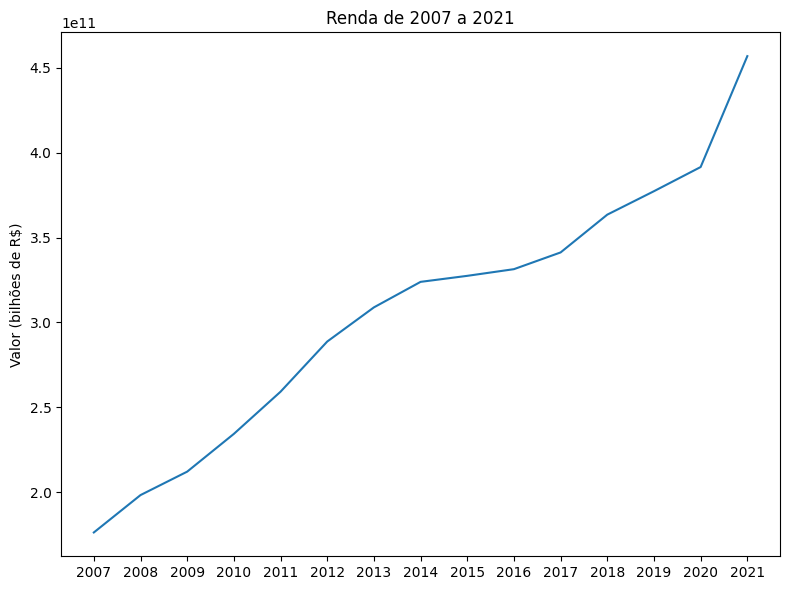

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(renda_ano["ano"] ,renda_ano["receita_operacional_liquida"])
plt.title("Renda de 2007 a 2021")
plt.ylabel("Valor (bilhões de R$)")
plt.yscale("linear")
plt.xticks(renda_ano.ano)
plt.tight_layout()
plt.show()

In [11]:
maior_rec_liq = si_capital.groupby("ano")[["receita_operacional_liquida"]].sum()
maior_rec_liq

,receita_operacional_liquida
ano,
2007,176240749000.00
2008,198260371000.00
2009,212071812000.00
2010,234326416000.00
2011,259166042000.00
2012,288721292000.00
2013,308846740000.00
2014,323884634000.00
2015,327428873000.00


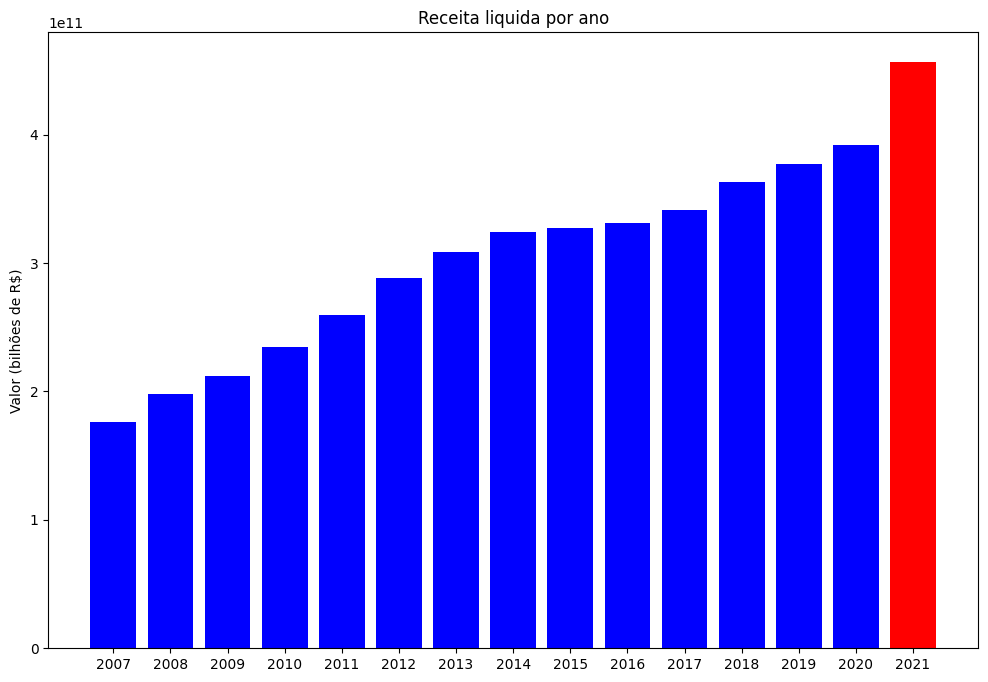

In [12]:
# Cores para cada barra, com a última em vermelho
cores = ['blue'] * (len(maior_rec_liq)) 
cores[-1] = "red" 

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(maior_rec_liq)):
    ax.bar(maior_rec_liq.index[i], maior_rec_liq.iloc[i], color=cores[i])

plt.xticks(maior_rec_liq.index, rotation=0)  

plt.title("Receita liquida por ano")
plt.ylabel("Valor (bilhões de R$)")
plt.show()

In [13]:
prod_setor_rec_liq_anual = si_capital.groupby(["ano", "setor"])[["receita_operacional_liquida"]].sum()
prod_subsetor_rec_liq_anual = prod_setor_rec_liq_anual.xs(2021, level="ano")
prod_subsetor_rec_liq_anual

,receita_operacional_liquida
setor,
agencia_noticias,2172460000.00
edicao,16544503000.00
serv_audvis,44472117000.00
telecom,179467345000.00
ti,214207142000.00


In [14]:
prod_subsetor_rec_liq_anual["total"] = 456863567000.00
prod_subsetor_rec_liq_anual["percent_total"] = (prod_subsetor_rec_liq_anual["receita_operacional_liquida"] / prod_subsetor_rec_liq_anual["total"]) * 100 
prod_subsetor_rec_liq_anual = prod_subsetor_rec_liq_anual.reset_index()
prod_subsetor_rec_liq_anual

C:\Users\everc\AppData\Local\Temp\ipykernel_3400\1563055793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_subsetor_rec_liq_anual["total"] = 456863567000.00
C:\Users\everc\AppData\Local\Temp\ipykernel_3400\1563055793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_subsetor_rec_liq_anual["percent_total"] = (prod_subsetor_rec_liq_anual["receita_operacional_liquida"] / prod_subsetor_rec_liq_anual["total"]) * 100


,setor,receita_operacional_liquida,total,percent_total
0,agencia_noticias,2172460000.00,456863567000.00,0.48
1,edicao,16544503000.00,456863567000.00,3.62
2,serv_audvis,44472117000.00,456863567000.00,9.73
3,telecom,179467345000.00,456863567000.00,39.28
4,ti,214207142000.00,456863567000.00,46.89


## Quanto dessa riqueza cada setor gerou?

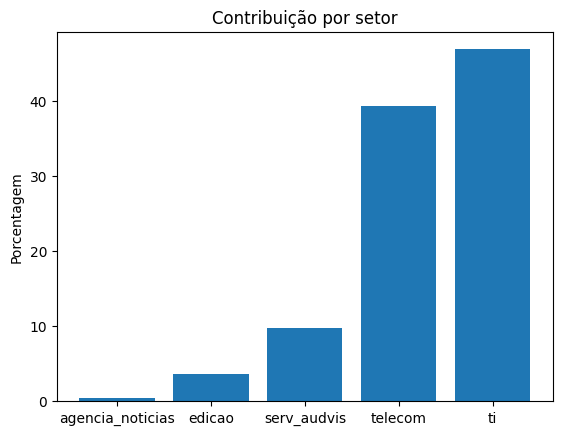

In [15]:
fig, ax = plt.subplots()
ax.bar(prod_subsetor_rec_liq_anual["setor"], prod_subsetor_rec_liq_anual["percent_total"])
ax.set_title('Contribuição por setor')
ax.set_ylabel('Porcentagem')
plt.show()

## Como foi a evolução para cada subsetor?

### Agência de Notícias

In [16]:
si_capital["setor"].value_counts()

setor
agencia_noticias    15
edicao              15
serv_audvis         15
telecom             15
ti                  15
Name: count, dtype: int64

In [17]:
agencia_noticiais_evo = si_capital[["ano","receita_operacional_liquida"]].loc[(si_capital["setor"] == "agencia_noticias")]
agencia_noticiais_evo

,ano,receita_operacional_liquida
0,2007,397811000.00
1,2008,421744000.00
2,2009,542945000.00
3,2010,686085000.00
4,2011,1189552000.00
5,2012,1366951000.00
6,2013,1560481000.00
7,2014,1629763000.00
8,2015,1724243000.00
9,2016,2193653000.00


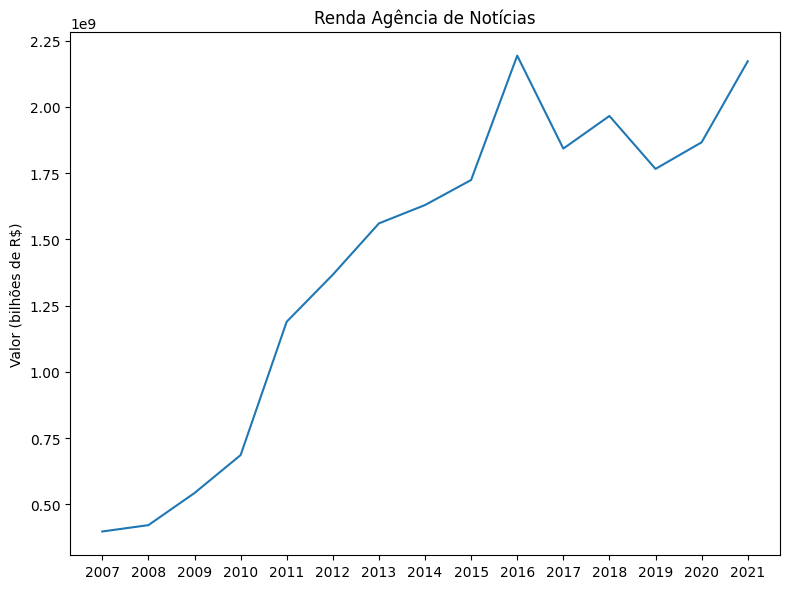

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(agencia_noticiais_evo["ano"] ,agencia_noticiais_evo["receita_operacional_liquida"])
plt.title("Renda Agência de Notícias")
plt.ylabel("Valor (bilhões de R$)")
plt.yscale("linear")
plt.xticks(agencia_noticiais_evo["ano"])
plt.tight_layout()
plt.show()

### Edição e Edição com Impressão

In [19]:
edicao_evo = si_capital[["ano","receita_operacional_liquida"]].loc[(si_capital["setor"] == "edicao")]
edicao_evo

,ano,receita_operacional_liquida
15,2007,15228480000.00
16,2008,16562731000.00
17,2009,17318248000.00
18,2010,20195231000.00
19,2011,20614565000.00
20,2012,20580880000.00
21,2013,19881388000.00
22,2014,19883622000.00
23,2015,18914541000.00
24,2016,17967332000.00


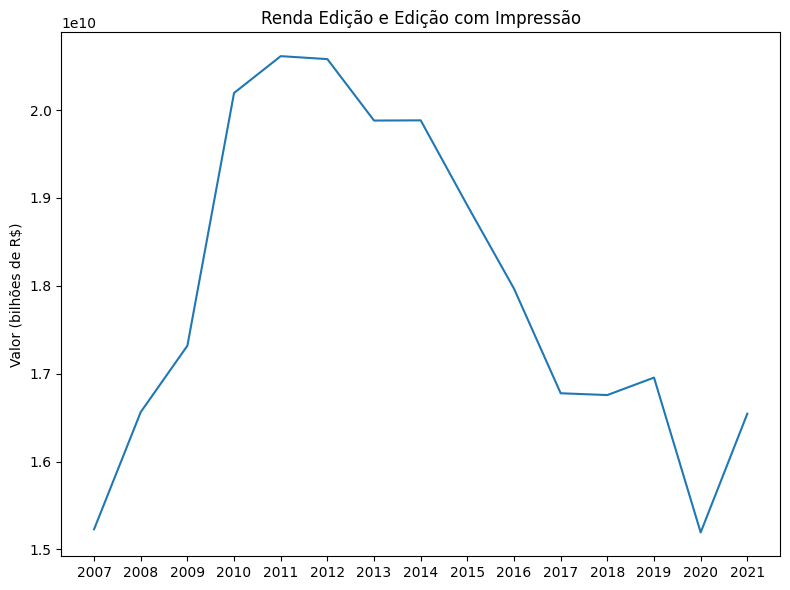

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(edicao_evo["ano"] ,edicao_evo["receita_operacional_liquida"])
plt.title("Renda Edição e Edição com Impressão")
plt.ylabel("Valor (bilhões de R$)")
plt.yscale("linear")
plt.xticks(edicao_evo["ano"])
plt.tight_layout()
plt.show()

### Serviços Audiovisuais

In [21]:
serv_audvis_evo = si_capital[["ano","receita_operacional_liquida"]].loc[(si_capital["setor"] == "serv_audvis")]
serv_audvis_evo

,ano,receita_operacional_liquida
30,2007,17440214000.00
31,2008,19893756000.00
32,2009,21916776000.00
33,2010,27272384000.00
34,2011,29961080000.00
35,2012,33119660000.00
36,2013,37655674000.00
37,2014,41145370000.00
38,2015,41302901000.00
39,2016,41168018000.00


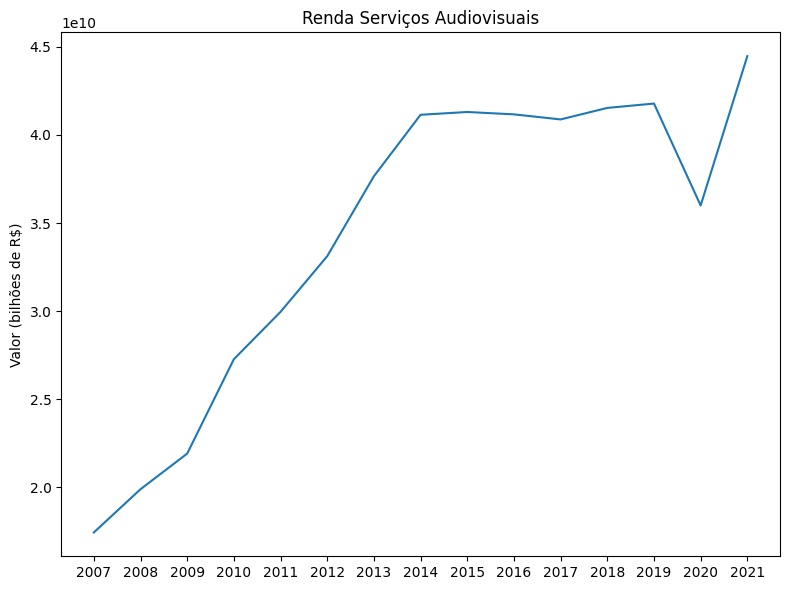

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(serv_audvis_evo["ano"] ,serv_audvis_evo["receita_operacional_liquida"])
plt.title("Renda Serviços Audiovisuais")
plt.ylabel("Valor (bilhões de R$)")
plt.yscale("linear")
plt.xticks(serv_audvis_evo["ano"])
plt.tight_layout()
plt.show()

### Telecomunicações

In [23]:
telecom_evo = si_capital[["ano","receita_operacional_liquida"]].loc[(si_capital["setor"] == "telecom")]
telecom_evo

,ano,receita_operacional_liquida
45,2007,106420779000.00
46,2008,120381912000.00
47,2009,125021960000.00
48,2010,131026343000.00
49,2011,143435374000.00
50,2012,159742035000.00
51,2013,165162006000.00
52,2014,168407528000.00
53,2015,162643396000.00
54,2016,161788570000.00


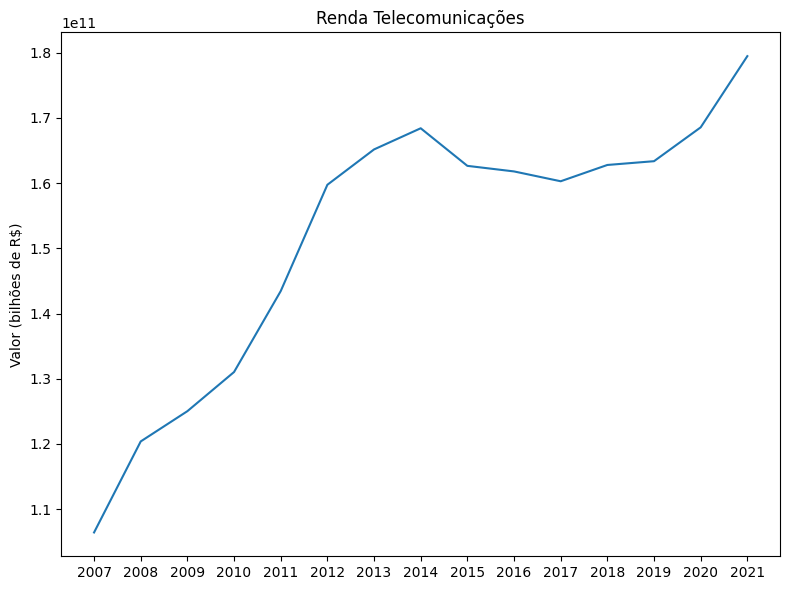

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(telecom_evo["ano"] ,telecom_evo["receita_operacional_liquida"])
plt.title("Renda Telecomunicações")
plt.ylabel("Valor (bilhões de R$)")
plt.yscale("linear")
plt.xticks(telecom_evo["ano"])
plt.tight_layout()
plt.show()

### Tecnologia da Informação

In [25]:
ti_evo = si_capital[["ano","receita_operacional_liquida"]].loc[(si_capital["setor"] == "ti")]
ti_evo

,ano,receita_operacional_liquida
60,2007,36753465000.00
61,2008,41000228000.00
62,2009,47271883000.00
63,2010,55146373000.00
64,2011,63965471000.00
65,2012,73911766000.00
66,2013,84587191000.00
67,2014,92818351000.00
68,2015,102843792000.00
69,2016,108245474000.00


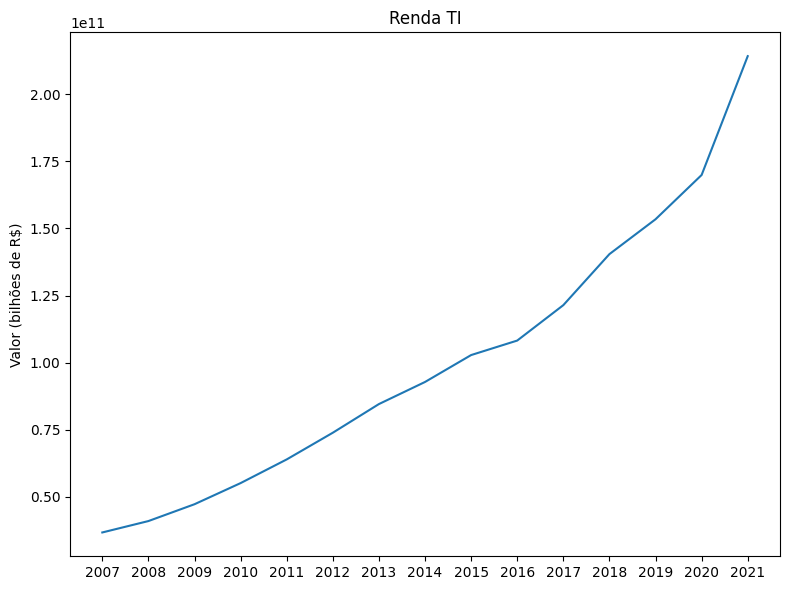

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ti_evo["ano"] ,ti_evo["receita_operacional_liquida"])
plt.title("Renda TI")
plt.ylabel("Valor (bilhões de R$)")
plt.yscale("linear")
plt.xticks(ti_evo["ano"])
plt.tight_layout()
plt.show()

## No período de 2007 a 2021, qual foi o ano que teve maior renda bruta? Quanto dessa riqueza cada setor gerou?

In [27]:
maior_renda_bruta = si_capital.groupby("ano")[["excedente_operacional_bruto"]].sum()
maior_renda_bruta

,excedente_operacional_bruto
ano,
2007,56311987.00
2008,59644719.00
2009,63416680.00
2010,72015019.00
2011,77686742.00
2012,89693177.00
2013,88591265.00
2014,90066669.00
2015,89314914.00


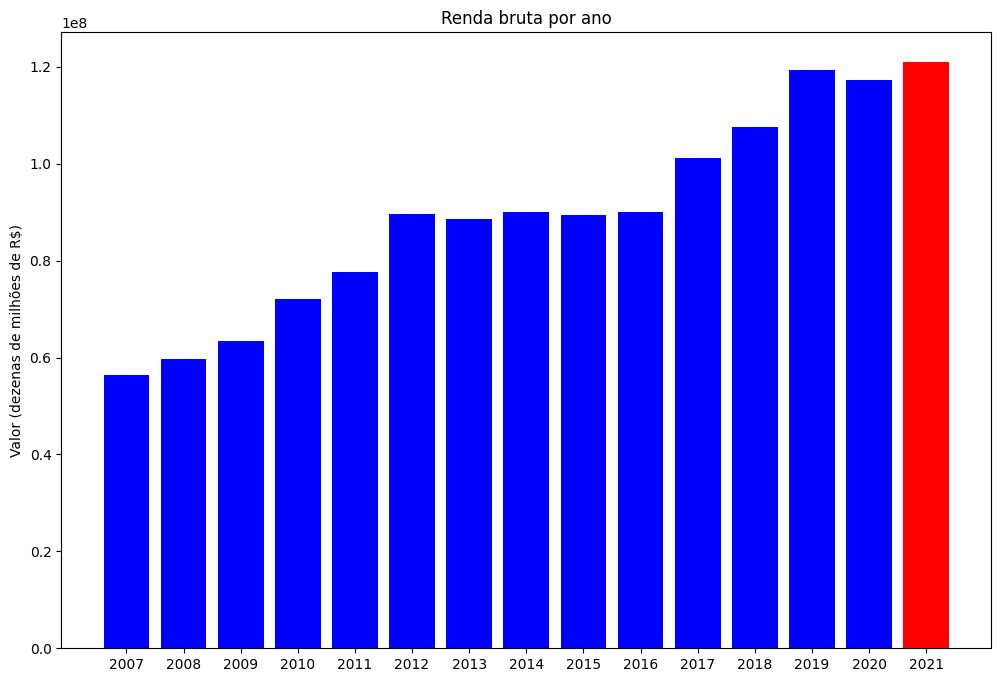

In [28]:
cores = ['blue'] * (len(maior_renda_bruta)) 
cores[-1] = "red" 

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(len(maior_renda_bruta)):
    ax.bar(maior_renda_bruta.index[i], maior_renda_bruta.iloc[i], color=cores[i])

plt.xticks(maior_renda_bruta.index, rotation=0)  

plt.title("Renda bruta por ano")
plt.ylabel("Valor (dezenas de milhões de R$)")
plt.show()

In [29]:
prod_setor_renda_bruta_anual = si_capital.groupby(["ano", "setor"])[["excedente_operacional_bruto"]].sum()
prod_setor_renda_bruta_anual.tail()

excedente_operacional_bruto
ano  setor                                        
2021 agencia_noticias                    655530.00
     edicao                             2979374.00
     serv_audvis                        7109000.00
     telecom                           67220547.00
     ti                                43091019.00

In [30]:
maior_renda_bruta_perc = prod_setor_renda_bruta_anual.xs(2021, level="ano")
maior_renda_bruta_perc["total"] = 121055470.00
maior_renda_bruta_perc["percent_total"] = (maior_renda_bruta_perc["excedente_operacional_bruto"] / maior_renda_bruta_perc["total"]) * 100 
maior_renda_bruta_perc = maior_renda_bruta_perc.reset_index()
maior_renda_bruta_perc

C:\Users\everc\AppData\Local\Temp\ipykernel_3400\2638715385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maior_renda_bruta_perc["total"] = 121055470.00
C:\Users\everc\AppData\Local\Temp\ipykernel_3400\2638715385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maior_renda_bruta_perc["percent_total"] = (maior_renda_bruta_perc["excedente_operacional_bruto"] / maior_renda_bruta_perc["total"]) * 100


,setor,excedente_operacional_bruto,total,percent_total
0,agencia_noticias,655530.00,121055470.00,0.54
1,edicao,2979374.00,121055470.00,2.46
2,serv_audvis,7109000.00,121055470.00,5.87
3,telecom,67220547.00,121055470.00,55.53
4,ti,43091019.00,121055470.00,35.60


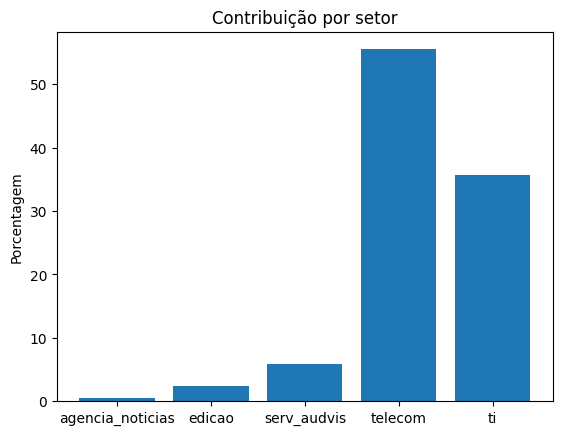

In [31]:
fig, ax = plt.subplots()
ax.bar(maior_renda_bruta_perc["setor"], maior_renda_bruta_perc["percent_total"])
ax.set_title('Contribuição por setor')
ax.set_ylabel('Porcentagem')
plt.show()

## No intervalo de anos no dataset, qual subsetor que mais contratou? Ao longo dos anos, qual foi o subsetor que, em média, manteve o maior número de empregados?

In [32]:
si_capital.columns

Index(['setor', 'ano', 'receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'valor_bruto_da_producao', 'consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais',
       'valor_adicionado_bruto_a_precos_basicos', 'gastos_com_pessoal_total',
       'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos

In [33]:
subsetor_empregados = si_capital[["ano", "setor", "pessoal_ocupado_em_31_12_pessoas"]]

In [34]:
quantidade_empregados = subsetor_empregados.groupby("setor")["pessoal_ocupado_em_31_12_pessoas"].sum()
quantidade_empregados = quantidade_empregados.reset_index()
quantidade_empregados

,setor,pessoal_ocupado_em_31_12_pessoas
0,agencia_noticias,209858.00
1,edicao,1502865.00
2,serv_audvis,1845172.00
3,telecom,2922092.00
4,ti,7738643.00


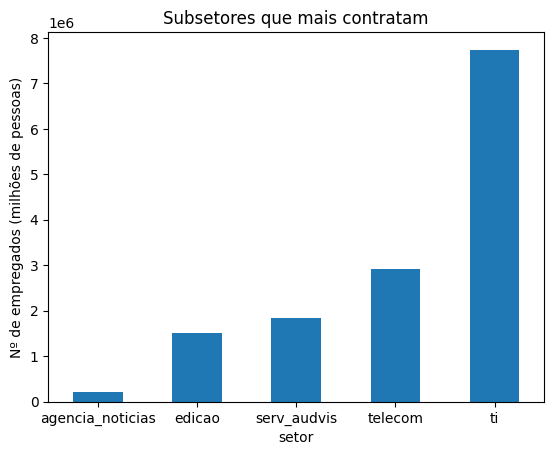

In [35]:
quantidade_empregados.plot(x="setor",y="pessoal_ocupado_em_31_12_pessoas",kind="bar")
plt.legend().remove()
plt.xticks(rotation=0) 
plt.title("Subsetores que mais contratam")
plt.ylabel("Nº de empregados (milhões de pessoas)")
plt.show()

In [36]:
media_empregados = subsetor_empregados.groupby("setor")["pessoal_ocupado_em_31_12_pessoas"].mean()
media_empregados

setor
agencia_noticias    13990.53
edicao             100191.00
serv_audvis        123011.47
telecom            194806.13
ti                 515909.53
Name: pessoal_ocupado_em_31_12_pessoas, dtype: float64

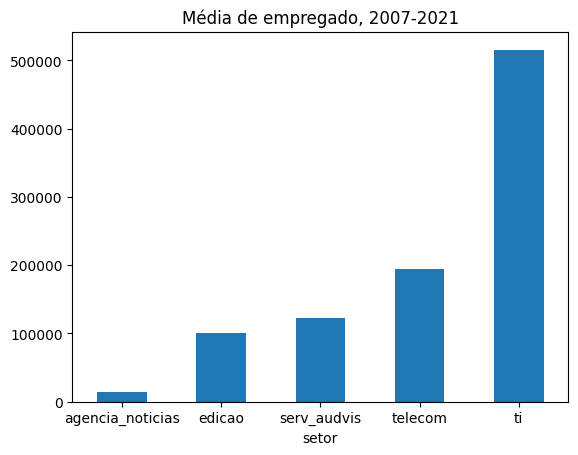

In [37]:
media_empregados.plot(kind="bar")
plt.xticks(rotation=0) 
plt.title("Média de empregado, 2007-2021")
plt.show()

## Qual subsetor teve os maiores custos intermediários ao longos dos anos? 

In [38]:
si_capital.columns

Index(['setor', 'ano', 'receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'valor_bruto_da_producao', 'consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais',
       'valor_adicionado_bruto_a_precos_basicos', 'gastos_com_pessoal_total',
       'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos

In [39]:
subsetores_custos_inter = si_capital[["ano", "setor", "consumo_intermediario_total"]]
subsetores_custos_inter.head()

,ano,setor,consumo_intermediario_total
0,2007,agencia_noticias,116064000.00
1,2008,agencia_noticias,132806000.00
2,2009,agencia_noticias,162131000.00
3,2010,agencia_noticias,210747000.00
4,2011,agencia_noticias,279328000.00


In [40]:
subsetores_custos_inter_anos = subsetores_custos_inter.groupby("setor")["consumo_intermediario_total"].sum()
subsetores_custos_inter_anos

setor
agencia_noticias      5930882000.00
edicao              146373799000.00
serv_audvis         293867931000.00
telecom            1218417662000.00
ti                  510211096000.00
Name: consumo_intermediario_total, dtype: float64

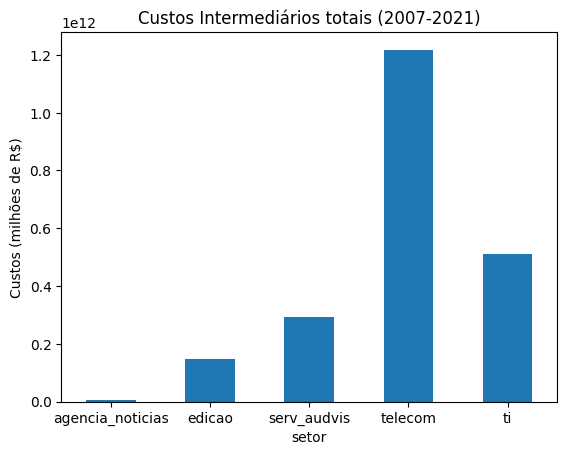

In [41]:
subsetores_custos_inter_anos.plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Custos Intermediários totais (2007-2021)")
plt.ylabel("Custos (milhões de R$)")
plt.show()

## Qual foi ano em que esse subsetor teve o maior custo intermediário?

In [42]:
subsetores_custos_inter.loc[subsetores_custos_inter["setor"] == "telecom"].sort_values(by="consumo_intermediario_total")

,ano,setor,consumo_intermediario_total
45,2007,telecom,54754338000.00
46,2008,telecom,63412444000.00
47,2009,telecom,68897340000.00
48,2010,telecom,71248077000.00
57,2019,telecom,77680906000.00
49,2011,telecom,81766636000.00
58,2020,telecom,83070071000.00
55,2017,telecom,85577309000.00
56,2018,telecom,86467977000.00
50,2012,telecom,87865057000.00


## Qual subsetor teve a maior eficiência pelo valor gerador a partir dos insumos de produtos/serviços? Quais subsetores foram os mais eficientes? Quais foram menos?

In [43]:
si_capital.columns

Index(['setor', 'ano', 'receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'valor_bruto_da_producao', 'consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais',
       'valor_adicionado_bruto_a_precos_basicos', 'gastos_com_pessoal_total',
       'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos

In [44]:
subsetores_eficiencia = si_capital[["ano", "setor", "valor_adicionado_bruto_a_precos_basicos"]]
subsetores_eficiencia = subsetores_eficiencia.groupby("setor")["valor_adicionado_bruto_a_precos_basicos"].sum()
subsetores_eficiencia = subsetores_eficiencia.sort_values()
subsetores_eficiencia

setor
agencia_noticias     15344982000.00
edicao              123366284000.00
serv_audvis         235556106000.00
ti                  916621960000.00
telecom            1042120546000.00
Name: valor_adicionado_bruto_a_precos_basicos, dtype: float64

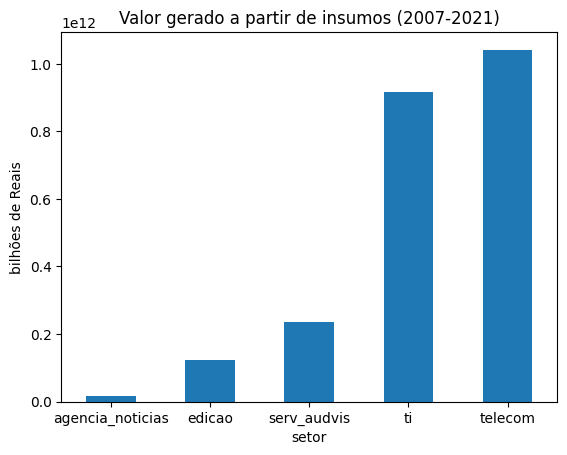

In [45]:
subsetores_eficiencia.plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("bilhões de Reais")
plt.title("Valor gerado a partir de insumos (2007-2021)")
plt.show()

## No geral, de todos os custos intermediários, quais foram os que custaram mais? e os que custaram menos?

In [46]:
si_capital.columns

Index(['setor', 'ano', 'receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'valor_bruto_da_producao', 'consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais',
       'valor_adicionado_bruto_a_precos_basicos', 'gastos_com_pessoal_total',
       'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos

In [47]:
maior_custo_inter = si_capital[['ano','consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais']]
maior_custo_inter = maior_custo_inter.groupby("ano").agg("sum")
maior_custo_inter = maior_custo_inter.agg("sum")
maior_custo_inter = maior_custo_inter.sort_values()
maior_custo_inter.index = ['premios_seg',
       'comb_lubrif',
       'serv_com',
       'eletr_gas_agua_esg',
       'alugueis',
       'materiais',
       'outros',
       'servicos_terceiros']
maior_custo_inter

premios_seg            4625564000.00
comb_lubrif            6975668000.00
serv_com              52226323000.00
eletr_gas_agua_esg    55686420000.00
alugueis             189503846000.00
materiais            226052276000.00
outros               798927094000.00
servicos_terceiros   876076995000.00
dtype: float64

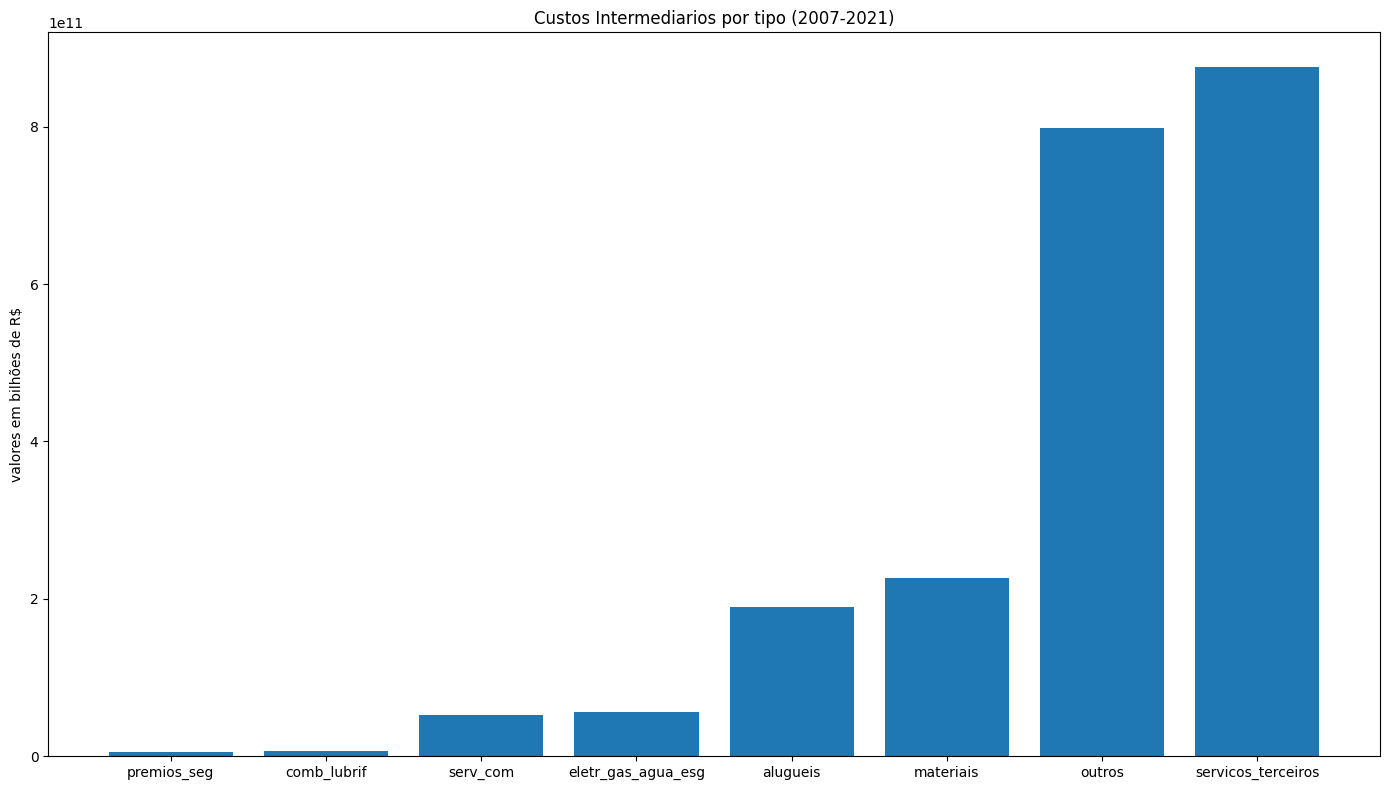

In [48]:
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(maior_custo_inter.index, maior_custo_inter)
ax.set_title("Custos Intermediarios por tipo (2007-2021)")
ax.set_ylabel("valores em bilhões de R$")
plt.tight_layout()
plt.show()

## Como esses custos evoluiram ao longo dos anos? 

In [49]:
custos_inter_evo = si_capital[['ano','consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais']]
custos_inter_evo.columns = ["ano", 'premios_seg',
       'comb_lubrif',
       'serv_com',
       'eletr_gas_agua_esg',
       'alugueis',
       'materiais',
       'outros',
       'servicos_terceiros']

In [50]:
custos_inter_evo = custos_inter_evo.groupby("ano").sum()
custos_inter_evo

,premios_seg,comb_lubrif,serv_com,eletr_gas_agua_esg,alugueis,materiais,outros,servicos_terceiros
ano,,,,,,,,
2007,6129003000.00,271408000.00,45299765000.00,6336098000.00,202002000.00,1892137000.00,1997572000.00,23114836000.00
2008,7381733000.00,279775000.00,50776278000.00,7235803000.00,258479000.00,2099984000.00,2046583000.00,27695132000.00
2009,7142846000.00,275634000.00,53975805000.00,8198691000.00,207822000.00,2381758000.00,2289572000.00,33641421000.00
2010,7936424000.00,323933000.00,56509858000.00,8048440000.00,194754000.00,2664308000.00,2494917000.00,38490213000.00
2011,10135327000.00,445120000.00,62011113000.00,8656799000.00,215515000.00,2922139000.00,2696412000.00,43601421000.00
2012,14758297000.00,410298000.00,61807885000.00,10178278000.00,242972000.00,3517368000.00,2986648000.00,48620994000.00
2013,15909113000.00,522771000.00,65383724000.00,11558155000.00,288152000.00,3473549000.00,2858626000.00,53965259000.00
2014,17067781000.00,530867000.00,60597292000.00,13558159000.00,305494000.00,4119344000.00,2984652000.00,59909296000.00
2015,19803558000.00,491640000.00,57062965000.00,15520244000.00,291066000.00,4125408000.00,3861069000.00,59707489000.00


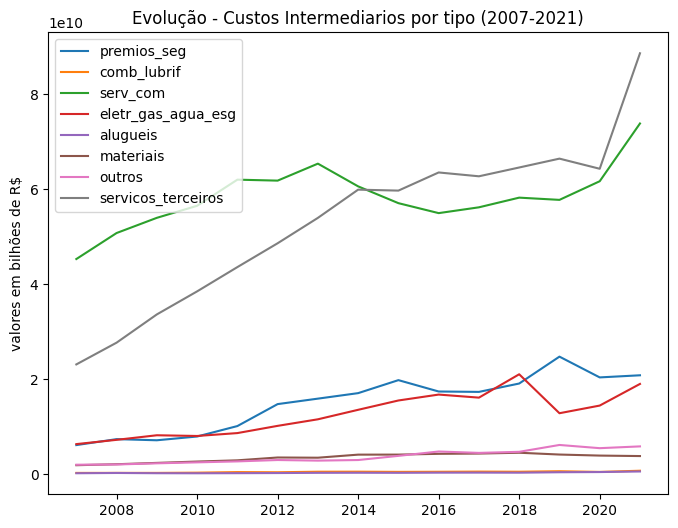

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
x = custos_inter_evo.index
ax.plot(x, custos_inter_evo.premios_seg, label="premios_seg")
ax.plot(x, custos_inter_evo.comb_lubrif, label="comb_lubrif")
ax.plot(x, custos_inter_evo.serv_com, label="serv_com")
ax.plot(x, custos_inter_evo.eletr_gas_agua_esg, label="eletr_gas_agua_esg")
ax.plot(x, custos_inter_evo.alugueis, label="alugueis")
ax.plot(x, custos_inter_evo.materiais, label="materiais")
ax.plot(x, custos_inter_evo.outros, label="outros")
ax.plot(x, custos_inter_evo.servicos_terceiros, label="servicos_terceiros")
ax.set_title("Evolução - Custos Intermediarios por tipo (2007-2021)")
ax.set_ylabel("valores em bilhões de R$")
ax.legend()
plt.show()

## No setor de serviços de informação e comunicação, qual foi o maior gasto com pessoal ao longo dos anos? 

In [52]:
si_capital.columns

Index(['setor', 'ano', 'receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'valor_bruto_da_producao', 'consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais',
       'valor_adicionado_bruto_a_precos_basicos', 'gastos_com_pessoal_total',
       'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos

In [53]:
maior_gastos_pessoal = si_capital[["ano", 'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos_com_pessoal_fgts',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_privada',
       'gastos_com_pessoal_indenizacoes_trabalhistas',
       'gastos_com_pessoal_beneficios_concedidos_aos_empregados']]
maior_gastos_pessoal.head()

,ano,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados
0,2007,105360000.00,20413000.00,7912000.00,730000.00,2180000.00,9103.00
1,2008,107650000.00,20133000.00,8063000.00,926000.00,2830000.00,10195.00
2,2009,149352000.00,23419000.00,11092000.00,2090000.00,4694000.00,14007.00
3,2010,200514000.00,27394000.00,12433000.00,649000.00,7623000.00,15816.00
4,2011,267346000.00,38409000.00,16381000.00,1741000.00,5920000.00,26819.00


In [54]:
maior_gastos_pessoal_evo = maior_gastos_pessoal.groupby("ano").sum()
maior_gastos_pessoal_evo

,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes,gastos_com_pessoal_contribuicoes_para_a_previdencia_social,gastos_com_pessoal_fgts,gastos_com_pessoal_contribuicoes_para_a_previdencia_privada,gastos_com_pessoal_indenizacoes_trabalhistas,gastos_com_pessoal_beneficios_concedidos_aos_empregados
ano,,,,,,
2007,18923746000.00,4046152000.00,1404150000.00,458176000.00,618237000.00,2735715.00
2008,21941249000.00,4772527000.00,1621972000.00,392296000.00,554798000.00,3270687.00
2009,24834163000.00,5355226000.00,1816126000.00,423078000.00,867404000.00,3913780.00
2010,30719243000.00,6098742000.00,2122470000.00,406042000.00,783181000.00,4339998.00
2011,34506450000.00,6871575000.00,2388737000.00,529164000.00,955710000.00,5416156.00
2012,37107112000.00,6335762000.00,2784331000.00,491909000.00,1256501000.00,6169104.00
2013,43183956000.00,6576843000.00,3196183000.00,585528000.00,1629569000.00,7315402.00
2014,48021140000.00,5832730000.00,3568652000.00,586003000.00,1850002000.00,7976996.00
2015,52103523000.00,6481387000.00,3865044000.00,581484000.00,1967729000.00,9323302.00


In [55]:
maior_gastos_pessoal_evo.columns = [
       'salarios_outros',
       'prev_soc',
       'fgts',
       'prev_priv',
       'ind_trab',
       'beneficios']
maior_gastos_pessoal_evo.columns

Index(['salarios_outros', 'prev_soc', 'fgts', 'prev_priv', 'ind_trab',
       'beneficios'],
      dtype='object')

In [56]:
maior_gastos_pessoal = maior_gastos_pessoal_evo.sum()
maior_gastos_pessoal = maior_gastos_pessoal.sort_values()
maior_gastos_pessoal

beneficios           120877702.00
prev_priv           8727760000.00
ind_trab           25154284000.00
fgts               50331380000.00
prev_soc          102317837000.00
salarios_outros   682495461000.00
dtype: float64

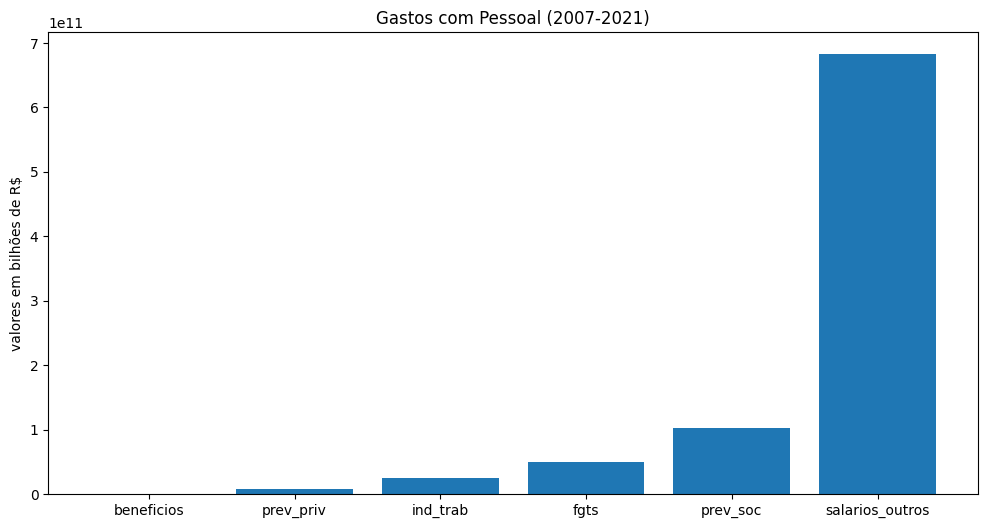

In [57]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(maior_gastos_pessoal.index, maior_gastos_pessoal)
ax.set_title("Gastos com Pessoal (2007-2021)")
ax.set_ylabel("valores em bilhões de R$")
plt.show()

## Em qual ano esse gasto teve seu maior valor? Como esses gastos evoluiram ao longo dos anos?

In [58]:
gastos_salarios = si_capital[["ano", "gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes"]]
gastos_salarios.head()

,ano,gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes
0,2007,105360000.00
1,2008,107650000.00
2,2009,149352000.00
3,2010,200514000.00
4,2011,267346000.00


In [59]:
gastos_salarios.columns = ["ano", "salarios_outros"]

In [60]:
maior_ano_gastos_salarios = gastos_salarios.groupby("ano").sum()
maior_ano_gastos_salarios = maior_ano_gastos_salarios.sort_values(by="salarios_outros")
maior_ano_gastos_salarios

,salarios_outros
ano,
2007,18923746000.00
2008,21941249000.00
2009,24834163000.00
2010,30719243000.00
2011,34506450000.00
2012,37107112000.00
2013,43183956000.00
2014,48021140000.00
2015,52103523000.00


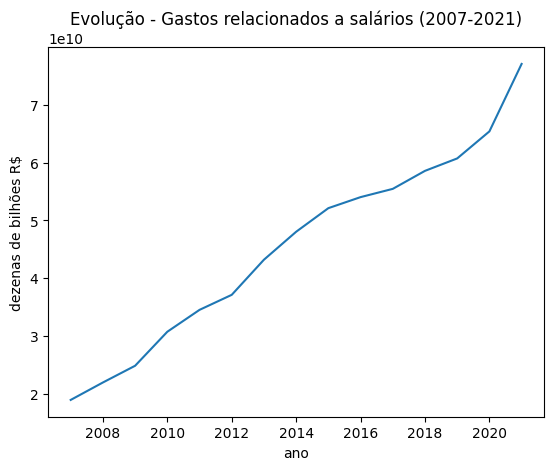

In [62]:
maior_ano_gastos_salarios.plot()
plt.legend().remove()
plt.ylabel("dezenas de bilhões R$")
plt.title("Evolução - Gastos relacionados a salários (2007-2021)")
plt.show()

## Qual foi, percentualmente falando, a contribuição de cada gasto com pessoal para o valor total de gasto com pessoal ao longo dos anos?

In [63]:
si_capital.columns

Index(['setor', 'ano', 'receita_operacional_liquida',
       'custo_das_mercadorias_revendidas_mil_reais',
       'subvencoes_e_outras_receitas_operacionais_mil_reais',
       'valor_bruto_da_producao', 'consumo_intermediario_total',
       'consumo_intermediario_mercadorias_materiais_de_consumo_e_de_reposicao',
       'consumo_intermediario_combustiveis_e_lubrificantes',
       'consumo_intermediario_servicos_prestados_por_terceiros',
       'consumo_intermediario_alugueis_de_imoveis_veiculos_maquinas_e_equipamentos',
       'consumo_intermediario_premios_de_seguros',
       'consumo_intermediario_servicos_de_comunicacao',
       'consumo_intermediario_energia_eletrica_gas_agua_e_esgoto',
       'consumo_intermediario_outros_custos_e_despesas_operacionais',
       'valor_adicionado_bruto_a_precos_basicos', 'gastos_com_pessoal_total',
       'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos

In [97]:
gastos_pessoal_perct_total = si_capital[["ano",'gastos_com_pessoal_salarios_retiradas_e_outras_remuneracoes',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_social',
       'gastos_com_pessoal_fgts',
       'gastos_com_pessoal_contribuicoes_para_a_previdencia_privada',
       'gastos_com_pessoal_indenizacoes_trabalhistas',
       'gastos_com_pessoal_beneficios_concedidos_aos_empregados', 'gastos_com_pessoal_total']]
gastos_pessoal_perct_total.columns = ["ano",'salarios_outros',
       'prev_soc',
       'fgts',
       'prev_priv',
       'ind_trab',
       'beneficios', "total"]
gastos_pessoal_perct_total.columns

Index(['ano', 'salarios_outros', 'prev_soc', 'fgts', 'prev_priv', 'ind_trab',
       'beneficios', 'total'],
      dtype='object')

In [98]:
gastos_pessoal_perct_total.head()

,ano,salarios_outros,prev_soc,fgts,prev_priv,ind_trab,beneficios,total
0,2007,105360000.00,20413000.00,7912000.00,730000.00,2180000.00,9103.00,145698000.00
1,2008,107650000.00,20133000.00,8063000.00,926000.00,2830000.00,10195.00,149799000.00
2,2009,149352000.00,23419000.00,11092000.00,2090000.00,4694000.00,14007.00,204667000.00
3,2010,200514000.00,27394000.00,12433000.00,649000.00,7623000.00,15816.00,264440000.00
4,2011,267346000.00,38409000.00,16381000.00,1741000.00,5920000.00,26819.00,356616000.00


In [99]:
gastos_pessoal_perct_total = gastos_pessoal_perct_total.groupby("ano").sum()

In [100]:
gastos_pessoal_perct_total.head()

,salarios_outros,prev_soc,fgts,prev_priv,ind_trab,beneficios,total
ano,,,,,,,
2007,18923746000.00,4046152000.00,1404150000.00,458176000.00,618237000.00,2735715.00,28186176000.00
2008,21941249000.00,4772527000.00,1621972000.00,392296000.00,554798000.00,3270687.00,32554330000.00
2009,24834163000.00,5355226000.00,1816126000.00,423078000.00,867404000.00,3913780.00,37210873000.00
2010,30719243000.00,6098742000.00,2122470000.00,406042000.00,783181000.00,4339998.00,44473367000.00
2011,34506450000.00,6871575000.00,2388737000.00,529164000.00,955710000.00,5416156.00,50674373000.00


In [101]:
gastos_pessoal_perct_total = gastos_pessoal_perct_total.reset_index()
gastos_pessoal_perct_total.head()

,ano,salarios_outros,prev_soc,fgts,prev_priv,ind_trab,beneficios,total
0,2007,18923746000.00,4046152000.00,1404150000.00,458176000.00,618237000.00,2735715.00,28186176000.00
1,2008,21941249000.00,4772527000.00,1621972000.00,392296000.00,554798000.00,3270687.00,32554330000.00
2,2009,24834163000.00,5355226000.00,1816126000.00,423078000.00,867404000.00,3913780.00,37210873000.00
3,2010,30719243000.00,6098742000.00,2122470000.00,406042000.00,783181000.00,4339998.00,44473367000.00
4,2011,34506450000.00,6871575000.00,2388737000.00,529164000.00,955710000.00,5416156.00,50674373000.00


In [102]:
gastos_pessoal_perct_total = gastos_pessoal_perct_total.sum()

In [103]:
gastos_pessoal_perct_total = pd.DataFrame(gastos_pessoal_perct_total)
gastos_pessoal_perct_total = gastos_pessoal_perct_total.iloc[1:, :]
gastos_pessoal_perct_total

,0
salarios_outros,682495461000.00
prev_soc,102317837000.00
fgts,50331380000.00
prev_priv,8727760000.00
ind_trab,25154284000.00
beneficios,120877702.00
total,989963441000.00


In [104]:
gastos_pessoal_perct_total.columns

RangeIndex(start=0, stop=1, step=1)

In [105]:
gastos_pessoal_perct_total.columns = ["valor"]
gastos_pessoal_perct_total = gastos_pessoal_perct_total.sort_values(by="valor")
gastos_pessoal_perct_total

,valor
beneficios,120877702.00
prev_priv,8727760000.00
ind_trab,25154284000.00
fgts,50331380000.00
prev_soc,102317837000.00
salarios_outros,682495461000.00
total,989963441000.00


In [106]:
gastos_pessoal_perct_total["total"] = 989963441000.00
gastos_pessoal_perct_total = gastos_pessoal_perct_total.iloc[:-1, :]
gastos_pessoal_perct_total

,valor,total
beneficios,120877702.00,989963441000.00
prev_priv,8727760000.00,989963441000.00
ind_trab,25154284000.00,989963441000.00
fgts,50331380000.00,989963441000.00
prev_soc,102317837000.00,989963441000.00
salarios_outros,682495461000.00,989963441000.00


In [107]:
gastos_pessoal_perct_total["perc_total"] = (gastos_pessoal_perct_total["valor"] / gastos_pessoal_perct_total["total"]) * 100
gastos_pessoal_perct_total

C:\Users\everc\AppData\Local\Temp\ipykernel_3400\1300807651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gastos_pessoal_perct_total["perc_total"] = (gastos_pessoal_perct_total["valor"] / gastos_pessoal_perct_total["total"]) * 100


,valor,total,perc_total
beneficios,120877702.00,989963441000.00,0.01
prev_priv,8727760000.00,989963441000.00,0.88
ind_trab,25154284000.00,989963441000.00,2.54
fgts,50331380000.00,989963441000.00,5.08
prev_soc,102317837000.00,989963441000.00,10.34
salarios_outros,682495461000.00,989963441000.00,68.94


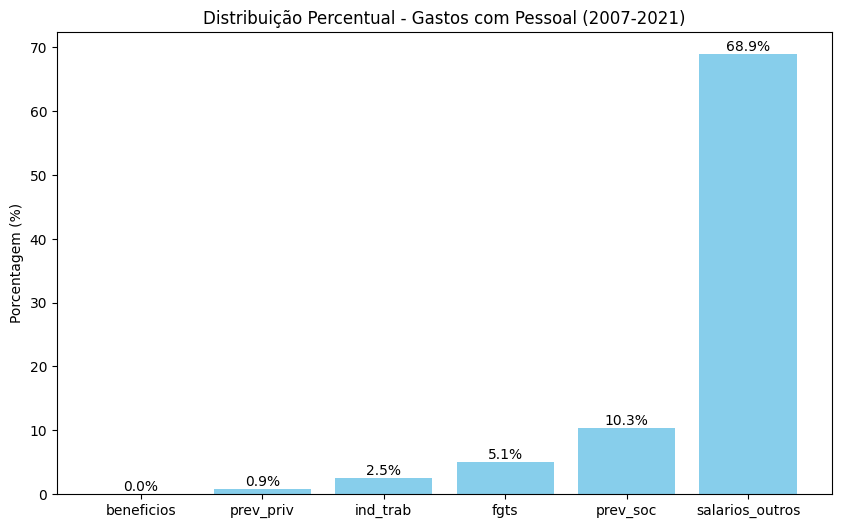

In [109]:
plt.figure(figsize=(10, 6))
bars = plt.bar(gastos_pessoal_perct_total.index, gastos_pessoal_perct_total['perc_total'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1f}%', ha='center', va='bottom')


plt.title('Distribuição Percentual - Gastos com Pessoal (2007-2021)')
plt.ylabel('Porcentagem (%)')
plt.show()